## Импорт необходимых библиотек

In [1]:
import pandas as pd # для преобразования данных в DataFrame
import numpy as np # для работы с массивами и матрицами
import matplotlib.pyplot as plt # для создания графиков, диаграмм и других визуализаций
import plotly.express as px # высокоуровневый интерфейс для создания интерактивных графиков

from sklearn.datasets import fetch_openml # для использования набор данных MNIST
from sklearn.manifold import TSNE # для визуализации с помощью t-SNE
from sklearn.cluster import AgglomerativeClustering # для иерархической кластеризации данных
from sklearn.metrics import silhouette_score # для использования метода Силуэта

from scipy.cluster.hierarchy import dendrogram # инструмент для визуализации иерархической кластеризации данных


import warnings # для подавления предупреждений во время выполнения программы

In [2]:
warnings.filterwarnings('ignore')

plt.style.use('dark_background')

## Загрузка набора данных

Fashion-MNIST – аналог знаменитого датасета MNIST, который состоит не из рукописных символов, а из предметов одежды. Он был создан, чтобы актуализировать учебные задачи в компьютерном зрении и приблизить их к реальности.

Каждое изображение представляет собой набор их 784 пикселей (28x28). Каждый пиксель принимает значение от 0 до 255, обозначая его цвет в черно-белой шкале. Обучающая выборка содержит 786 столбцов, где первый (label) – принадлежность изображения к классу, а последний – его уникальный номер (id). Остальные столбцы – пиксели изображения.
Проведите первичный анализ данных, чтобы определить наличие NaN значений.
Тестовая выборка (на основе которой должно быть получено исследование) содержит все те же столбцы, кроме label.

0. T-shirt/top – футболка
1. Trouser – брюки
2. Pullover – свитер
3. Dress – платье
4. Coat – пальто
5. Sandal – сандалия
6. Shirt – рубашка
7. Sneaker – кроссовок
8. Bag – сумка
9. Ankle boot – сапог

In [6]:
# создадим словарь меток
classes = {
    0: 'Футболка/топ',
    1: 'Брюки',
    2: 'Пуловер',
    3: 'Платье',
    4: 'Пальто',
    5: 'Сандалия',
    6: 'Рубашка',
    7: 'Кроссовки',
    8: 'Сумка',
    9: 'Ботинки'
}

In [13]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# для этого нам необходимо знать имя набора данных и версию
# также указываем что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y)
# иначе он выгрузит в формате словаря с полной выкладкой
# наконец попросим выгрузить данные в формате dataframe (as_frame)
# иначе будут numpy массивы
X, y  = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame = True)
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1
X.shape

(70000, 784)

Оставим первые 1000 изображений и соответствующие им метки классов, преобразованные в целочисленный формат.

In [19]:
X_part, y_part = X.values[:1000], y[:1000].astype(int).values

# Применение метода визуализации t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) - это метод визуализации, который используется для снижения размерности данных и визуализации высокоразмерных данных в двумерное или трехмерное пространство. Он позволяет сохранить структуру и расстояния между точками данных, что делает его особенно полезным для визуализации сложных многомерных данных.

Основная идея t-SNE заключается в том, чтобы отобразить точки данных из исходного пространства в новое пространство таким образом, чтобы сохранить расстояния между близкими точками и минимизировать расстояния между далекими точками. Это позволяет выявить скрытые структуры и кластеры в данных.



In [28]:
plt.style.use('fivethirtyeight')

In [20]:
def plot_data_multy(ax,ds,name=''):
    # Разделение набора данных ds на два массива: X, который содержит координаты
    # точек, и y, который содержит соответствующие метки классов.
    X, y = ds

    ax.set_title(name) # Установка заголовка для оси, если предоставлено имя.

    # Для каждой точки в наборе данных выполняются следующие действия:
    for i in range(X.shape[0]):
        # Вывод метки класса в точке на графике. Цвет метки зависит от значения
        # y[i], и используется цветовая карта tab10
        # используется для добавления текста на график
        plt.text(X[i, 0], X[i, 1], # Координаты x и y точки на графике, в которой будет размещена метка класса
                 str(y[i]), # Текст метки класса, который будет отображен на графике
                 color=plt.cm.tab10((y[i]+0.5)/10), # Цвет метки, выбранный из
                                                      # цветовой карты tab10.
                                                      # Цветовая карта преобразует
                                                      # числовые значения в цвета,
                                                      # и (y[i]+0.5)/10 используется
                                                      # для нормализации значения
                                                      # y[i] в диапазон, который
                                                      # поддерживается цветовой картой tab10
                 fontdict={'weight': 'bold', 'size': 9}) # Словарь, определяющий
                                                         # стиль шрифта для текста метки.
                                                         # Здесь текст будет жирным
                                                         # ('weight': 'bold') и
                                                         # размером шрифта 9

    # Вычисление минимального и максимального значения для оси x, учитывая небольшой отступ
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    # Аналогично для оси y.
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Установка пределов осей x и y соответственно.
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    # Удаление меток оси x и y, чтобы сделать график более чистым и удобным для чтения.
    ax.set_xticks(())
    ax.set_yticks(())

## perplexity=5

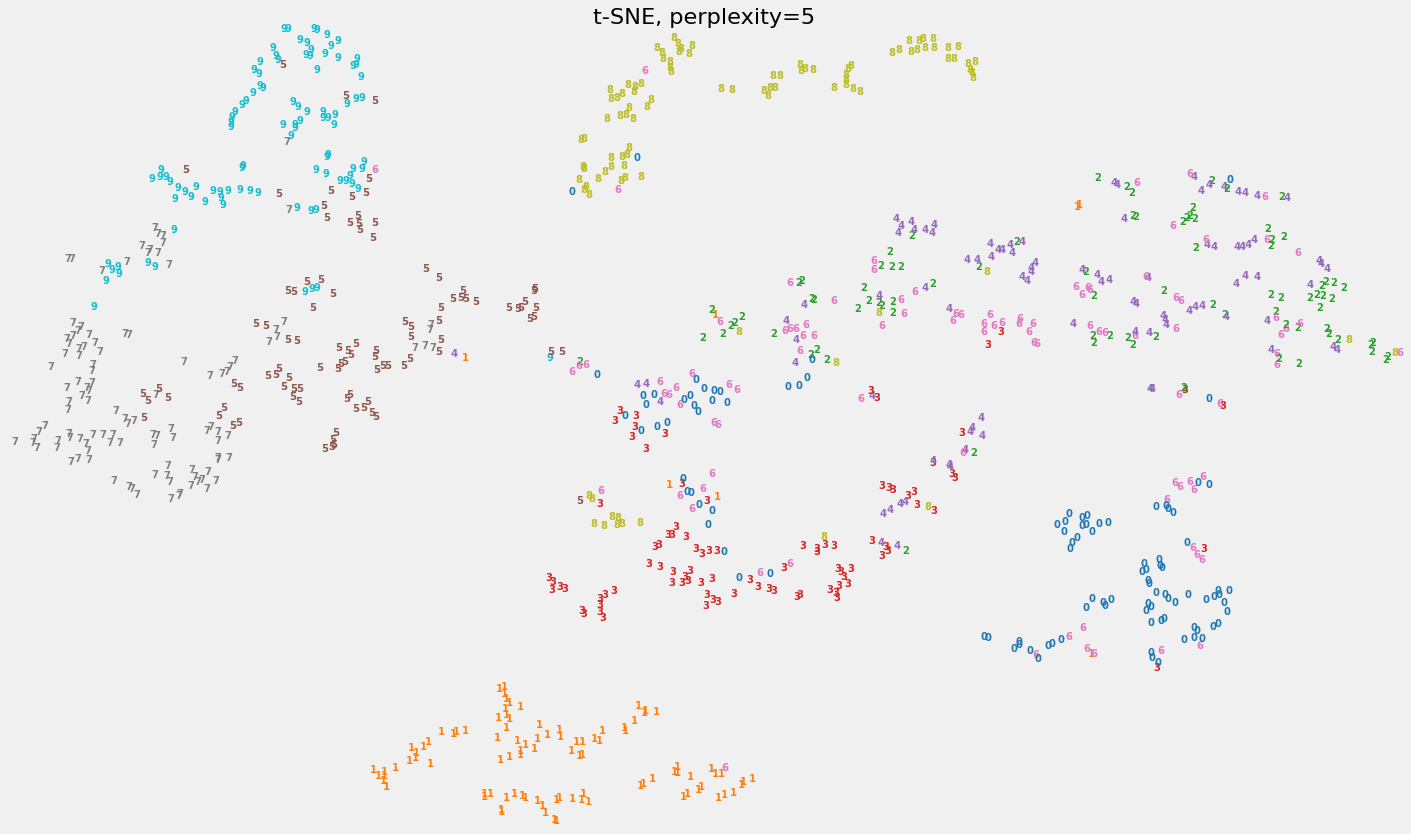

In [31]:
# Создается экземпляр класса TSNE с заданными гиперпараметрами
tsne_5 = TSNE(n_components=2, # указывает, что мы хотим визуализировать данные в
                            # двухмерном пространстве
            verbose=0, # включает вывод сообщений о процессе обучения
            perplexity=5, # рекомендуемый диапазон: от 5 до 50
            n_iter=5000, # этот параметр определяет максимальное количество итераций
            learning_rate = 'auto', # позволяет алгоритму автоматически
                                    # определить оптимальную скорость обучения
            init = 'pca') # указывает, что начальное вложение будет создано с
                          # использованием главных компонент (PCA), что обычно
                          # дает более стабильные результаты
'''
Выполняется обучение алгоритма t-SNE на подмножестве данных X_part.
Метод fit_transform обучает модель на данных и одновременно преобразует данные
в пространство с меньшей размерностью, в данном случае в двухмерное пространство
'''
tsne_results_5 = tsne_5.fit_transform(X_part)

fig = plt.figure(figsize=(20,12))
'''
создает ось (Axes) внутри фигуры. Функция subplot используется для добавления
осей на фигуру. Параметры 1, 1, 1 указывают, что будет создана одна строка и
одна колонка осей, и что текущая ось будет первой (и единственной) на этой сетке.
Это означает, что будет создана одна ось, занимающая всю фигуру
'''
ax = plt.subplot(1, 1, 1)
'''
Эта функция принимает ось ax, на которой будет визуализирована информация,
кортеж данных [tsne_results, y_part], содержащий результаты t-SNE и
соответствующие метки классов, и строку 't-SNE', которая будет использована в
качестве заголовка графика
'''
plot_data_multy(ax,[tsne_results_5,y_part],'t-SNE, perplexity=5')

## perplexity=25

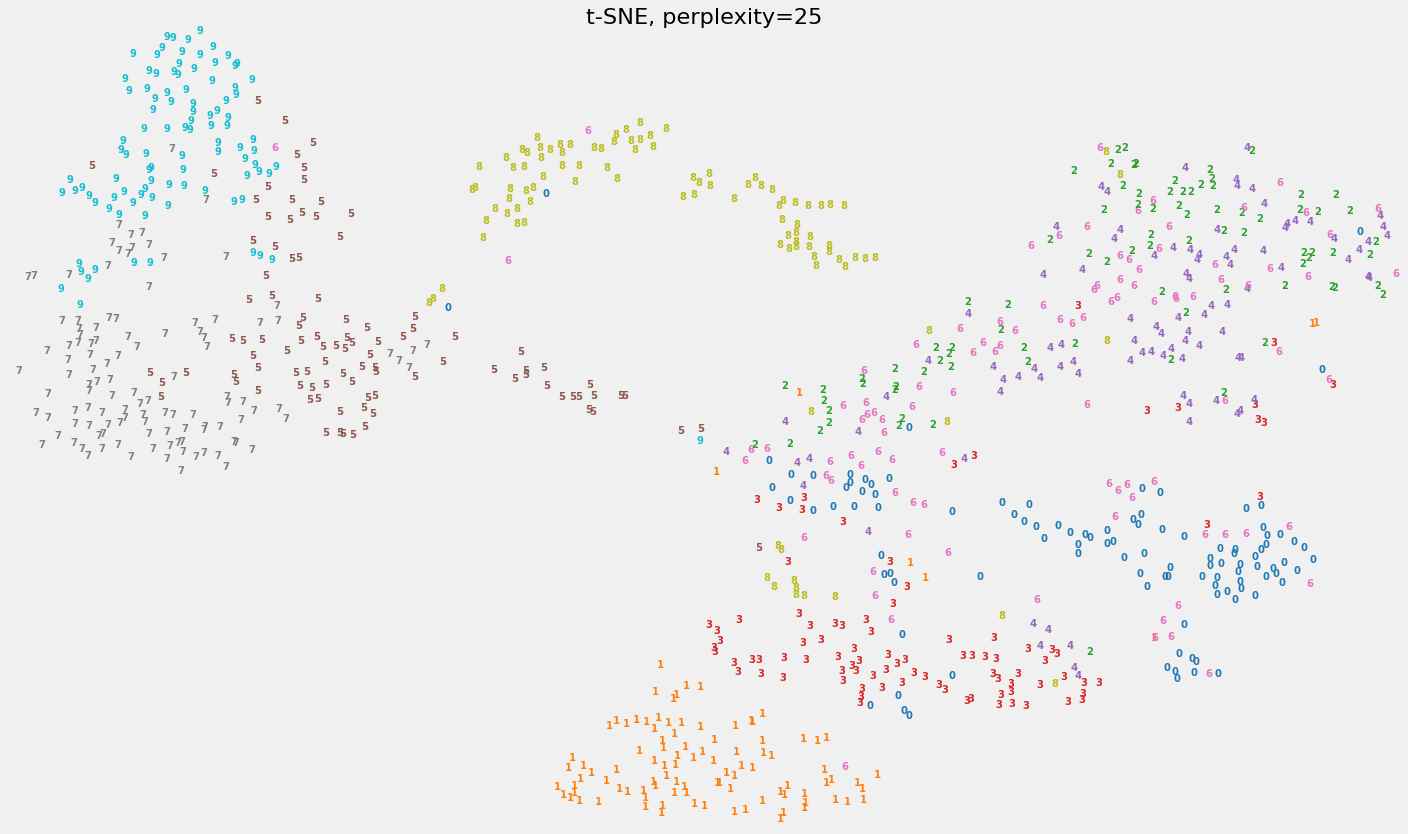

In [32]:
tsne_25 = TSNE(perplexity=25, n_iter=5000)
tsne_results_25 = tsne_25.fit_transform(X_part)
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(1, 1, 1)
plot_data_multy(ax,[tsne_results_25,y_part],'t-SNE, perplexity=25')

## perplexity=50

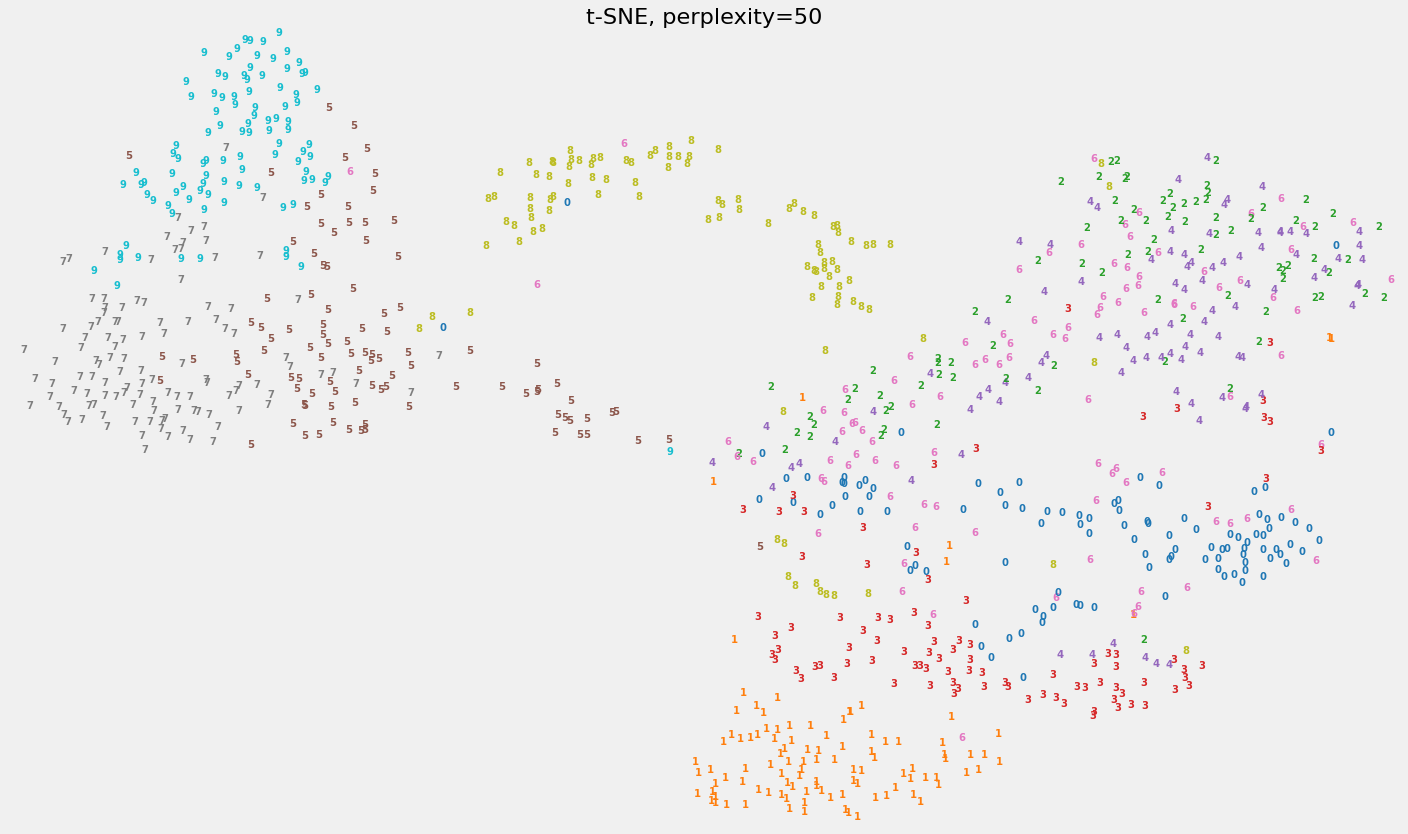

In [33]:
tsne_50 = TSNE(perplexity=50, n_iter=5000)
tsne_results_50 = tsne_50.fit_transform(X_part)
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(1, 1, 1)
plot_data_multy(ax,[tsne_results_50,y_part],'t-SNE, perplexity=50')

## Небольшие выводы

1. При значении `perplexity` 5:
    - Кластер 0 (футболки) разбит на два кластера по разные стороны от кластера 3 (платья).
    - Кластеры 1 (брюки), 3(платья), 8(сумки) хорошо сгруппированы.
    - Кластеры 2 (пуловеры), 4 (пальто), 6 (рубашки) слились вместе.
    - Кластеры 5 (сандали), 7 (кроссовки), 9 (ботинки) немного смешаны, но их можно разделить друг от друга.
2. При увеличении значения `perplexity` до 25:
    - Кластер 3 (платья) не разбивает кластер 0 (футболки), теперь кластер 0 лучше сгруппирован.
    - Кластеры 1 (брюки), 3(платья), 8(сумки) еще лучше сгруппированы.
    - Кластеры 2 (пуловеры), 4 (пальто), 6 (рубашки) как будто пытаются сгруппироватсья в один кластер.
    - Кластеры 5 (сандали), 7 (кроссовки), 9 (ботинки) заметно лучше сгруппировались.
    - Особых ухудшений ни в одном кластере не обнаружено.
3. При дальнейшем увеличении значения `perplexity` до 50:
    - Кластер 0 (футболки). 2 (пуловеры), 4 (пальто), 6 (рубашки) решили объединиться.
    - Кластеры 7 и 5 тоже слились, что стало хуже.
    - остальные классы прослеживаются уверено.

Таким образом, дальнейшую работу будет проводить с результатами t-SNE при `perplexity` равным 25.

## Интерактивная версия визуализации

In [36]:
'''
Создается DataFrame с двумя столбцами, которые соответствуют двум координатам
вложения t-SNE. Это делается для удобства работы с данными в виде таблицы и для
возможности применять к ним стандартные функции pandas
'''
df = pd.DataFrame(tsne_results_25, columns = ['t-SNE_1', 't-SNE_2'])
'''
Добавляется новый столбец number в DataFrame, который содержит метки классов из
y_part. Метод astype(str) используется для преобразования целочисленных меток
классов в строки, что удобно для последующей работы с данными, например, при
визуализации или сохранении в файл
'''
df['number'] = y_part.astype(str)

In [37]:
fig = px.scatter( # Создается скриптограмма с помощью функции scatter из Plotly Express
        df, # Данные для графика берутся из DataFrame df
        x='t-SNE_1', y='t-SNE_2', # Точки на графике размещаются по координатам t-SNE_1 и t-SNE_2, которые являются результатами t-SNE
        color = 'number', # Цвет точек определяется по значению столбца number, который содержит метки классов
        labels={'color': 'number'}, # Метки классов также используются для создания легенды графика
        hover_data=[df.index] # При наведении на точку отображается ее индекс из DataFrame
)

# Обновляется макет графика. Устанавливается высота и ширина графика в пикселях,
# а также используется темная тема "plotly_dark" для графика
fig.update_layout(
    height=800,
    width=1400,
    template = "plotly_dark"
)

# Обновляются свойства трассировок (точек на графике). Устанавливается позиция
# текста для меток классов в центре сверху каждой точки
fig.update_traces(textposition='top center')

fig.show()

In [39]:
shady_figs = [56,  # 6 (рубашка) среди 0 (футболок)
              160, # 0 (футболка) среди 3 (платьев)
              204, # 3 (платье) среди 2 (пуловеров), 4 (пальто), 6 (рубашек)
              287, # 8 (сумка) среди 3 (платьев)
              347, # 8 (сумка) среди 0 (футболок)
              572, # 1 (брюки) близко 2 (пуловерам), 4 (пальто), 6 (рубашкам)
              635, # 7 (кроссовки) среди 9 (ботильонов)
              688, # 6 (рубашка) среди 1 (брюк)
              872, # 1 (брюки) близко 2 (пуловерам), 4 (пальто), 6 (рубашкам)
              972, # 0 (футболка) среди 8 (сумок)
              ]

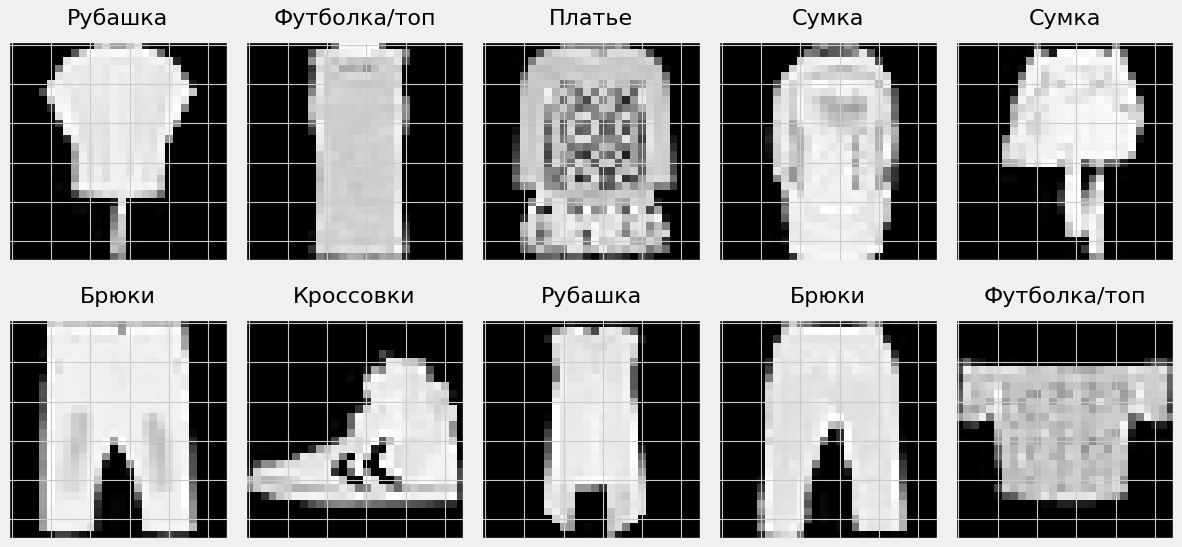

In [40]:
# Создается новая фигура с заданными размерами в дюймах.
# Ширина фигуры - 15 дюймов, а высота - 8 дюймов.
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for n, i in enumerate(shady_figs): # Для каждого индекса из списка shady_figs выполняются следующие действия
    # каждое изображение будет на своем сабплоте
    # Добавляется подграфик на фигуру. Параметры 2,5,n+1 указывают, что будет
    # создана сетка из 2 строк и 5 столбцов, и что текущий подграфик будет
    # n+1-м на этой сетке
    ax = fig.add_subplot(2,5,n+1)
    # Устанавливается заголовок подграфика, который показывает, какое число должно быть на изображении
    ax.set_title(labels[int(y[i])], size=20)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    # Извлекает пиксельные значения изображения для конкретного индекса i из
    # DataFrame X, преобразует их в массив размером 28x28 (что соответствует
    # размеру изображения в MNIST), и затем преобразует значения в тип float.
    # После этого к значениям применяется операция `1 -`, чтобы инвертировать
    # изображение (чтобы черный цвет стал белым и наоборот).
    ax.matshow(1 - X.loc[i,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    # Метки оси x и y скрываются, чтобы сделать график более чистым и удобным для чтения.
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    # Автоматически настраивает расположение подграфиков на фигуре, чтобы они
    # были равномерно распределены и не перекрывались
    plt.tight_layout()

# Выбор метода кластеризации

Для кластеризации набора данных Fashion-MNIST, как и для любого другого, выбор метода зависит от данных.

- **EM-Кластеризация** подходит для данных с неизвестным количеством кластеров, но в данном случае количество классов известно и равно 10, что делает этот метод менее предпочтительным.

- **DBSCAN** хорошо подходит для данных с различной плотностью, но не всегда эффективен для задач кластеризации с известным количеством классов, так как он может не всегда корректно определять границы кластеров.

- **Иерархическая кластеризация** позволяет визуализировать структуру данных и выбрать оптимальное количество кластеров.

- **Спектральная кластеризация** использует собственные векторы матрицы смежности для кластеризации и может быть эффективной для данных с высокой размерностью, но в контексте Fashion-MNIST, где изображения уже сокращены до 28x28 пикселей, этот метод может не принести значительного улучшения.

Исходя из вышесказанного, **иерархическая кластеризация** может быть наиболее подходящим выбором для кластеризации набора данных Fashion-MNIST, так как она позволяет визуализировать структуру данных и выбрать оптимальное количество кластеров. Однако, хорошо бы, провести эксперименты с различными методами и гиперпараметрами, чтобы определить наилучший подход для конкретной задачи, но в рамках учебного домашнего задание этого делать не будем в виду ограниченности времени и ресурсов.

# Иерархическая кластеризация

## Визуализации результатов кластеризации

In [41]:
def plot_clustering(X, hc, title, ax=None):
    """Визуализация результатов кластеризации
    Входные переменные:
    ===========
    X: данные, на которых мы хотим построить визуализацию
    hc: обученный класс Иерархической кластеризации
    """
    labels = hc.fit_predict(X) # предсказываем метки кластеров
    if ax is None:
        ax = plt.subplot(1, 1, 1) # создаем полотно, если ax не передан
    # отрисовываем скатерограмму
    ax.scatter(X[:, 0], X[:, 1], # данные
                    c=labels,  # подкрашиваем по предсказанным меткам
                    alpha = 0.75, # прозрачность
                    cmap = 'bwr', # тип цветовой карты
                    edgecolor = 'k', # цвет края - черный
                    s = 100  # размер
               )
    plt.xticks([],[])
    plt.yticks([],[])
    ax.set_title(title) # добавляем название графика

Сначала создаем объект нужного класса, в котором можем изменять гиперпараметры.

В случае `иерархической кластеризации` в основном меняем:    
* `linkage` - тип связей (варианты  `'ward'`, `'average'`, `'complete'`, `'single'`),
* `n_clusters` - потенциальное число кластеров (в нашем случае 10),
* `distance_threshold` - порог по расстоянию (т.к. `n_clusters` задан, то указываем `None`),
* `compute_distances=True` - позволит вычислить расстояния между кластерами, даже если не используется порог по расстоянию.

In [42]:
# Создаем класс иерархической кластеризации
hc_ward = AgglomerativeClustering(distance_threshold=None,
                                  compute_distances=True,
                                  n_clusters=10,
                                  linkage='ward')
# обучаем
hc_ward.fit(tsne_results_50)

hc_average = AgglomerativeClustering(distance_threshold=None,
                                     compute_distances=True,
                                     n_clusters=10,
                                     linkage='average')
hc_average.fit(tsne_results_50)

hc_complete = AgglomerativeClustering(distance_threshold=None,
                                      compute_distances=True,
                                      n_clusters=10,
                                      linkage='complete')
hc_complete.fit(tsne_results_50)

hc_single = AgglomerativeClustering(distance_threshold=None,
                             n_clusters=10,
                             linkage='single')
hc_single.fit(tsne_results_50);

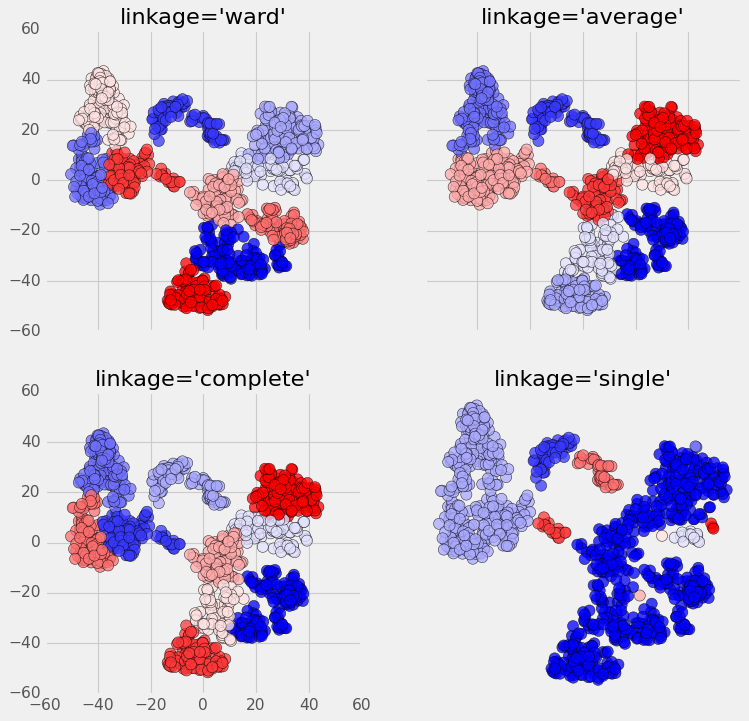

In [44]:
# Создаем сетку подграфиков размером 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Первый подграфик
plot_clustering(tsne_results_25, hc_ward, ax=axs[0, 0], title="linkage='ward'")

# Второй подграфик
plot_clustering(tsne_results_25, hc_average, ax=axs[0, 1], title="linkage='average'")

# Третий подграфик
plot_clustering(tsne_results_25, hc_complete, ax=axs[1, 0], title="linkage='complete'")

# Четвертый подграфик
plot_clustering(tsne_results_25, hc_single, ax=axs[1, 1], title="linkage='single'")

# Убираем лишние подписи осей
for ax in axs.flat:
    ax.label_outer()

plt.show()

## Отрисовка дендрограммы

In [45]:
def plot_dendrogram(model, write_split, **kwargs):
    # Считаем количество объектов в "конце" дендрограммы
    # для этого анализируем всех "детей"
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # подготавливаем данные для функции дендрограммы
    # указываем всех детей, расстояния и наш счетчик
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # строим соответствующую дендрограмму (она сразу визуализирует)
    ddata = dendrogram(linkage_matrix, **kwargs)

    plt.title('Дендрограмма иерархической кластеризации')
    plt.xlabel('индекс образца или (размер кластера)')
    plt.ylabel('расстояние')
    # добавим "изюминок" - точек разделения с подписями значений расстояния на разбиении
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > write_split:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                          textcoords='offset points',
                          va='top', ha='center')

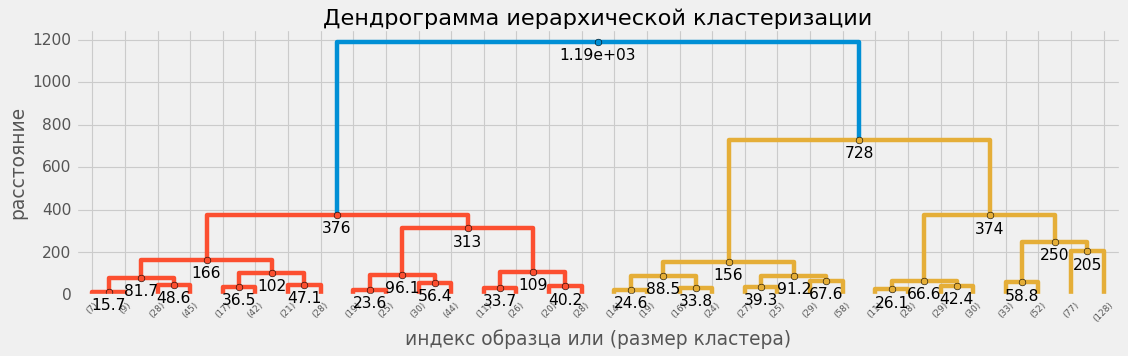

In [46]:
plt.figure(figsize=(15,4))
plot_dendrogram(hc_ward, write_split=1, truncate_mode='level', p=4)

## Решение о кластеризации с использованием порога по расстоянию

Когда есть дендрограмма, можно принимать решение о кластеризации с использованием порога по расстоянию.

Слегка модифицированный паттерн применения:

1. Создаем объект, в котором можем менять гиперпараметры

* `linkage` - берем тот же что и был при построения дендрограммы,
* `distance_threshold` - порог по расстоянию (из дендрограммы),
* `n_clusters` - потенциальное число кластеров (`None`, т.к. указываем `distance_threshold`, а одновременно указывать число кластеров и порог по расстоянию нельзя).

2. Обучаем методом `.fit()` (указываем только `X` - это же обучение без учителя).

3. Делаем предсказания - доступен `.fit_predict()` (т.е. **НЕЛЬЗЯ** подставлять новые данные).

4. Анализируем результат (в этом случае предлагается визуализация с подсцветкой).

# Задание distance_threshold

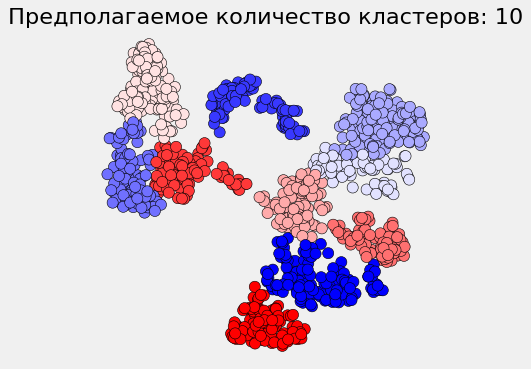

In [47]:
#@title Задание distance_threshold { run: "auto" }
#@markdown Можно писать число
dt = 140 #@param {type:"number"}


# создаем объект
hc = AgglomerativeClustering(distance_threshold=dt,
                                n_clusters=None,
                                linkage='ward')
# обучаем на данных
hc = hc.fit(tsne_results_25)

# предсказываем метки кластеров для данных
labels=hc.fit_predict(tsne_results_25)

# визуализируем с подкрашиванием
plt.figure(figsize=(5,5))
plt.scatter(tsne_results_25[:, 0], tsne_results_25[:, 1], cmap = 'bwr',
            c=labels, edgecolors = 'k',
             s=100)

n_clusters_ = hc.n_clusters_
plt.title('Предполагаемое количество кластеров: %d' % n_clusters_)
plt.xticks([],[])
plt.yticks([],[])
plt.grid()

# Выводы

Метод визуализации t-SNE смог выделить, можно правильно посчитать, 10 отдельных кластеров из 10.

Мы смогли визуально посмотреть структура данных в пространстве, оценить. Выбранный способ кластеризации предложил столько же кластеров, сколько и было изначально в датасете, не смотря на то, что некоторые классы у нас пытались слиться в один.

Для оценки качества кластеров можно использовать критерий Силуэта. Этот критерий оценивает, насколько хорошо каждый объект соответствует своему кластеру по сравнению с другими кластерами.

In [49]:
labels = hc_ward.fit_predict(tsne_results_25)
silhouette_avg = silhouette_score(tsne_results_25, labels)
print("Среднее значение критерия Силуэта: ", silhouette_avg)

Среднее значение критерия Силуэта:  0.44458532


Значение коэффициента силуэта (silhouette score) 0.44 указывает на то, что средняя степень разделения между кластерами в вашем наборе данных довольно хорошая. Значение коэффициента силуэта обычно находится между -1 и 1, где:

- Значение близкое к 1 указывает на то, что точки хорошо отделены друг от друга и находятся внутри своих кластеров.
- Значение близкое к 0 указывает на перекрытие кластеров.
- Значение близкое к -1 указывает на то, что точки могут быть неправильно присвоены кластерам.

Таким образом, значение 0.44 обычно считается хорошим показателем разделения кластеров